# Lookback time (different dark energy models movie)
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
20 July 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.max_open_warning': 20})

In [2]:
from LookbackTimeLib import *

In [3]:
class movie:
    def __init__(self, t, a4=None, a5=None, a6=None, a7=None):
        self.fig, self.ax = plt.subplots(1,1, figsize=(6,4))
        self.steps = len(t)
        self.a4, self.a5, self.a6, self.a7 = a4, a5, a6, a7
        self.t = t

    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        ax = self.ax
        a4, a5, a6, a7 = self.a4, self.a5, self.a6, self.a7
        t = self.t
        frame = 0
        Nstart = 0
        ax.set_xlim([tminDE-1.,tmaxDE])
        ax.set_ylim([0.,5.])
        if a4 is not None:
            self.plot1, = ax.plot(t[Nstart:frame], a4[Nstart:frame], color="C9")
        else:
            self.plot1 = None
        if a5 is not None:
            self.plot2, = ax.plot(t[Nstart:frame], a5[Nstart:frame], color=c_phantom)
        else:
            self.plot2 = None
        if a6 is not None:
            self.plot3, = ax.plot(t[Nstart:frame], a6[Nstart:frame], color=c_freezing)
        else:
            self.plot3 = None
        if a7 is not None:
            self.plot4, = ax.plot(t[Nstart:frame], a7[Nstart:frame], color=c_thawing)
        else:
            self.plot4 = None
        return self.plot1, self.plot2, self.plot3, self.plot4, 
    
    # Update function
    def update(self, frame):
        a4, a5, a6, a7 = self.a4, self.a5, self.a6, self.a7
        t = self.t
        Nstart = NpastDE if frame>NpastDE else 0
        
        if a4 is not None:
            self.plot1.set_data(t[Nstart:frame], a4[Nstart:frame])
        if a5 is not None:
            self.plot2.set_data(t[Nstart:frame], a5[Nstart:frame])
        if a6 is not None:
            self.plot3.set_data(t[Nstart:frame], a6[Nstart:frame])
        if a7 is not None:
            self.plot4.set_data(t[Nstart:frame], a7[Nstart:frame])
        return self.plot1, self.plot2, self.plot3, self.plot4, 
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=len(t), init_func=self.init, blit=False)
        return animation

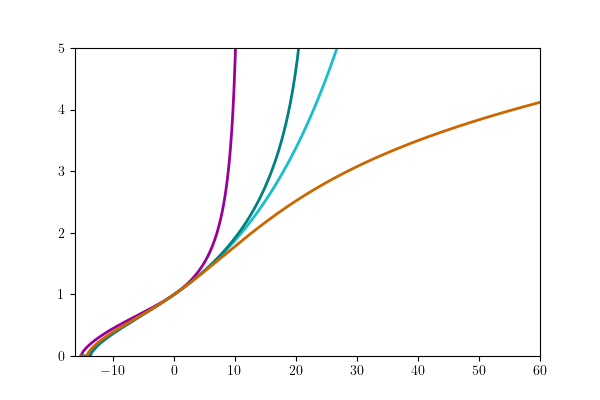

In [4]:
i=Nframes-1
frame = movie(tDE, a4DE, a5DE, a6DE, a7DE)
frame.init();
frame.update(i);

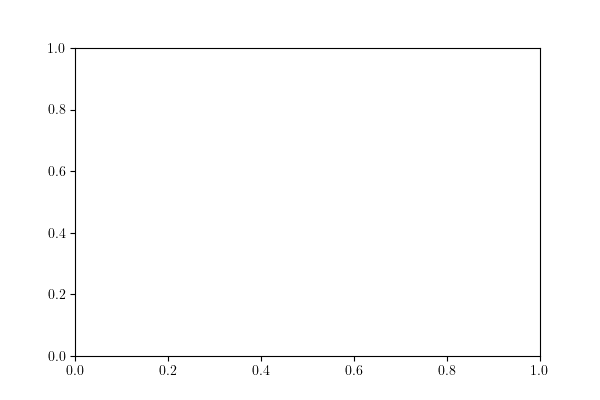

In [5]:
this_movie = movie(tDE, a4DE, a5DE, a6DE, a7DE)
animation = this_movie.animate()

In [6]:
animation.save("output/ScaleFactorvsTimeDE.mp4", dpi=300, fps=48)